In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load digits
digits = load_digits()

print("Image Data and Labels Shape:", digits.data.shape,  digits.target.shape)
print("Image Data Size:", digits.data[0].size)

Image Data and Labels Shape: (1797, 64) (1797,)
Image Data Size: 64


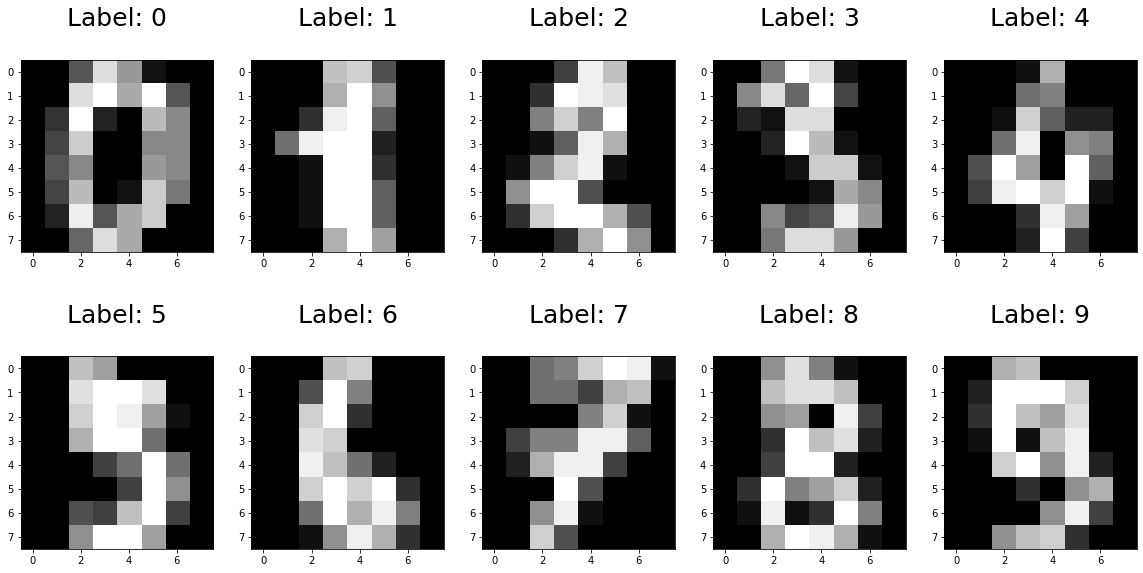

In [3]:
# Display the first 10 images and labels
plt.figure(figsize=(20, 10))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title('Label: %i\n' % label, fontsize=25)

In [4]:
test_size = 0.25
n_neighbors = 3

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=test_size, random_state=0)

In [5]:
# Initialize the KNN model
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(x_train, y_train)
# Evaluate/predict the test data
knn_predictions = model.predict(x_test)

In [7]:
# Initialize the SGD model
model = SGDClassifier(max_iter=500)
model.fit(x_train, y_train)
# Evaluate/predict the test data
sgd_predictions = model.predict(x_test)

In [8]:
# Initialize the DT model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# Evaluate/predict the test data
dt_predictions = model.predict(x_test)

In [9]:
# Display the results
print("COMP9517 Week 5 Lab - Solution")
print("\nTest size = %.2f" % test_size)

print("KNN Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, knn_predictions), metrics.recall_score(y_test, knn_predictions, average='macro')))
print("SGD Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, sgd_predictions), metrics.recall_score(y_test, sgd_predictions, average='macro')))
print("DT Accuracy:   %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, dt_predictions), metrics.recall_score(y_test, dt_predictions, average='macro')))

print("\nKNN Confusion Matrix:")
print(metrics.confusion_matrix(y_test, knn_predictions))


COMP9517 Week 5 Lab - Solution

Test size = 0.25
KNN Accuracy:  0.987 	 Recall: 0.987 
SGD Accuracy:  0.938 	 Recall: 0.940 
DT Accuracy:   0.844 	 Recall: 0.846 

KNN Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  2  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 47]]
